**Reading the data**

In [102]:
#import the numpy and panda and data visualization package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

**Importing the CSV file to the google collab**

In [103]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing (2).csv


**Reading the CSV file**

In [104]:
file=pd.read_csv("Housing.csv")
home=pd.DataFrame(file)
#Head of the dataset
home.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Examining the dataset**

In [105]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [106]:
home.shape

(545, 13)

In [107]:
home.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


**Data Cleaning**

In [108]:
#Check for null values
home.isnull().sum()*100/home.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

**Outliers Analysis**

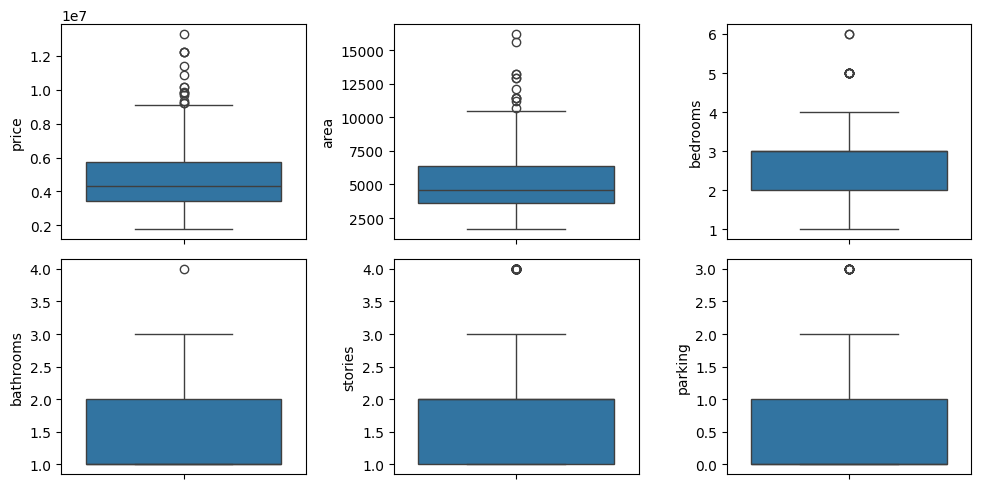

In [109]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(home['price'], ax = axs[0,0])
plt2 = sns.boxplot(home['area'], ax = axs[0,1])
plt3 = sns.boxplot(home['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(home['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(home['stories'], ax = axs[1,1])
plt3 = sns.boxplot(home['parking'], ax = axs[1,2])

plt.tight_layout()

**Outliers treatment**

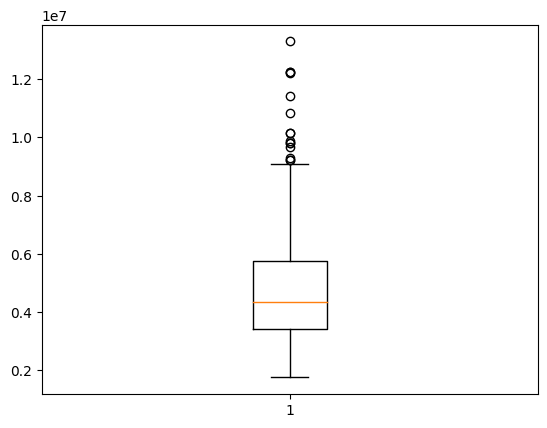

In [110]:
#outliers treatment for price
plt.boxplot(home.price)
Q1 = home.price.quantile(0.25)
Q3 = home.price.quantile(0.75)
IQR = Q3 - Q1
home = home[(home.price >= Q1 - 1.5*IQR) & (home.price <= Q3 + 1.5*IQR)]

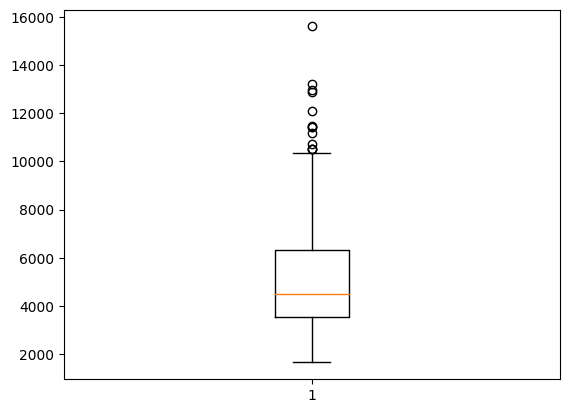

In [111]:
# outlier treatment for area
plt.boxplot(home.area)
Q1 = home.area.quantile(0.25)
Q3 = home.area.quantile(0.75)
IQR = Q3 - Q1
home = home[(home.area >= Q1 - 1.5*IQR) & (home.area <= Q3 + 1.5*IQR)]

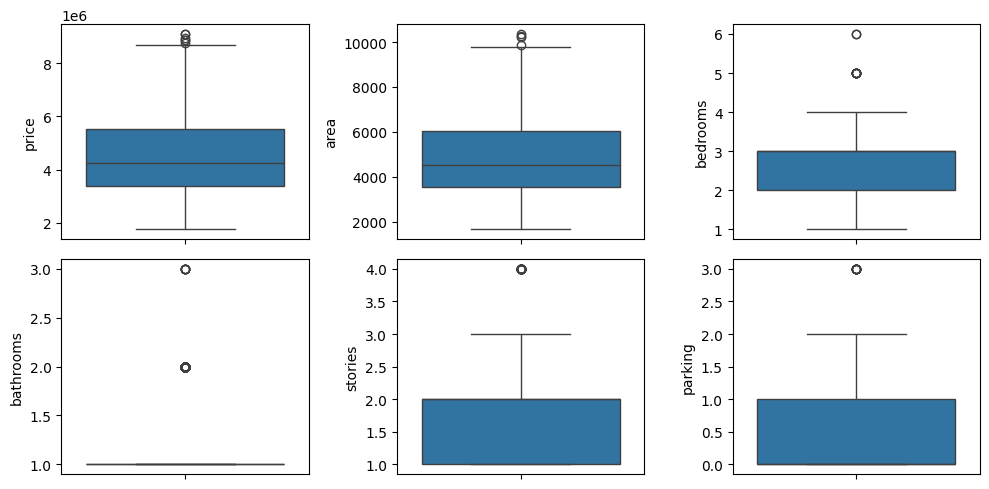

In [112]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(home['price'], ax = axs[0,0])
plt2 = sns.boxplot(home['area'], ax = axs[0,1])
plt3 = sns.boxplot(home['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(home['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(home['stories'], ax = axs[1,1])
plt3 = sns.boxplot(home['parking'], ax = axs[1,2])

plt.tight_layout()

**Understanding the data [Data Visualization]**

Visualising Numeric Variables

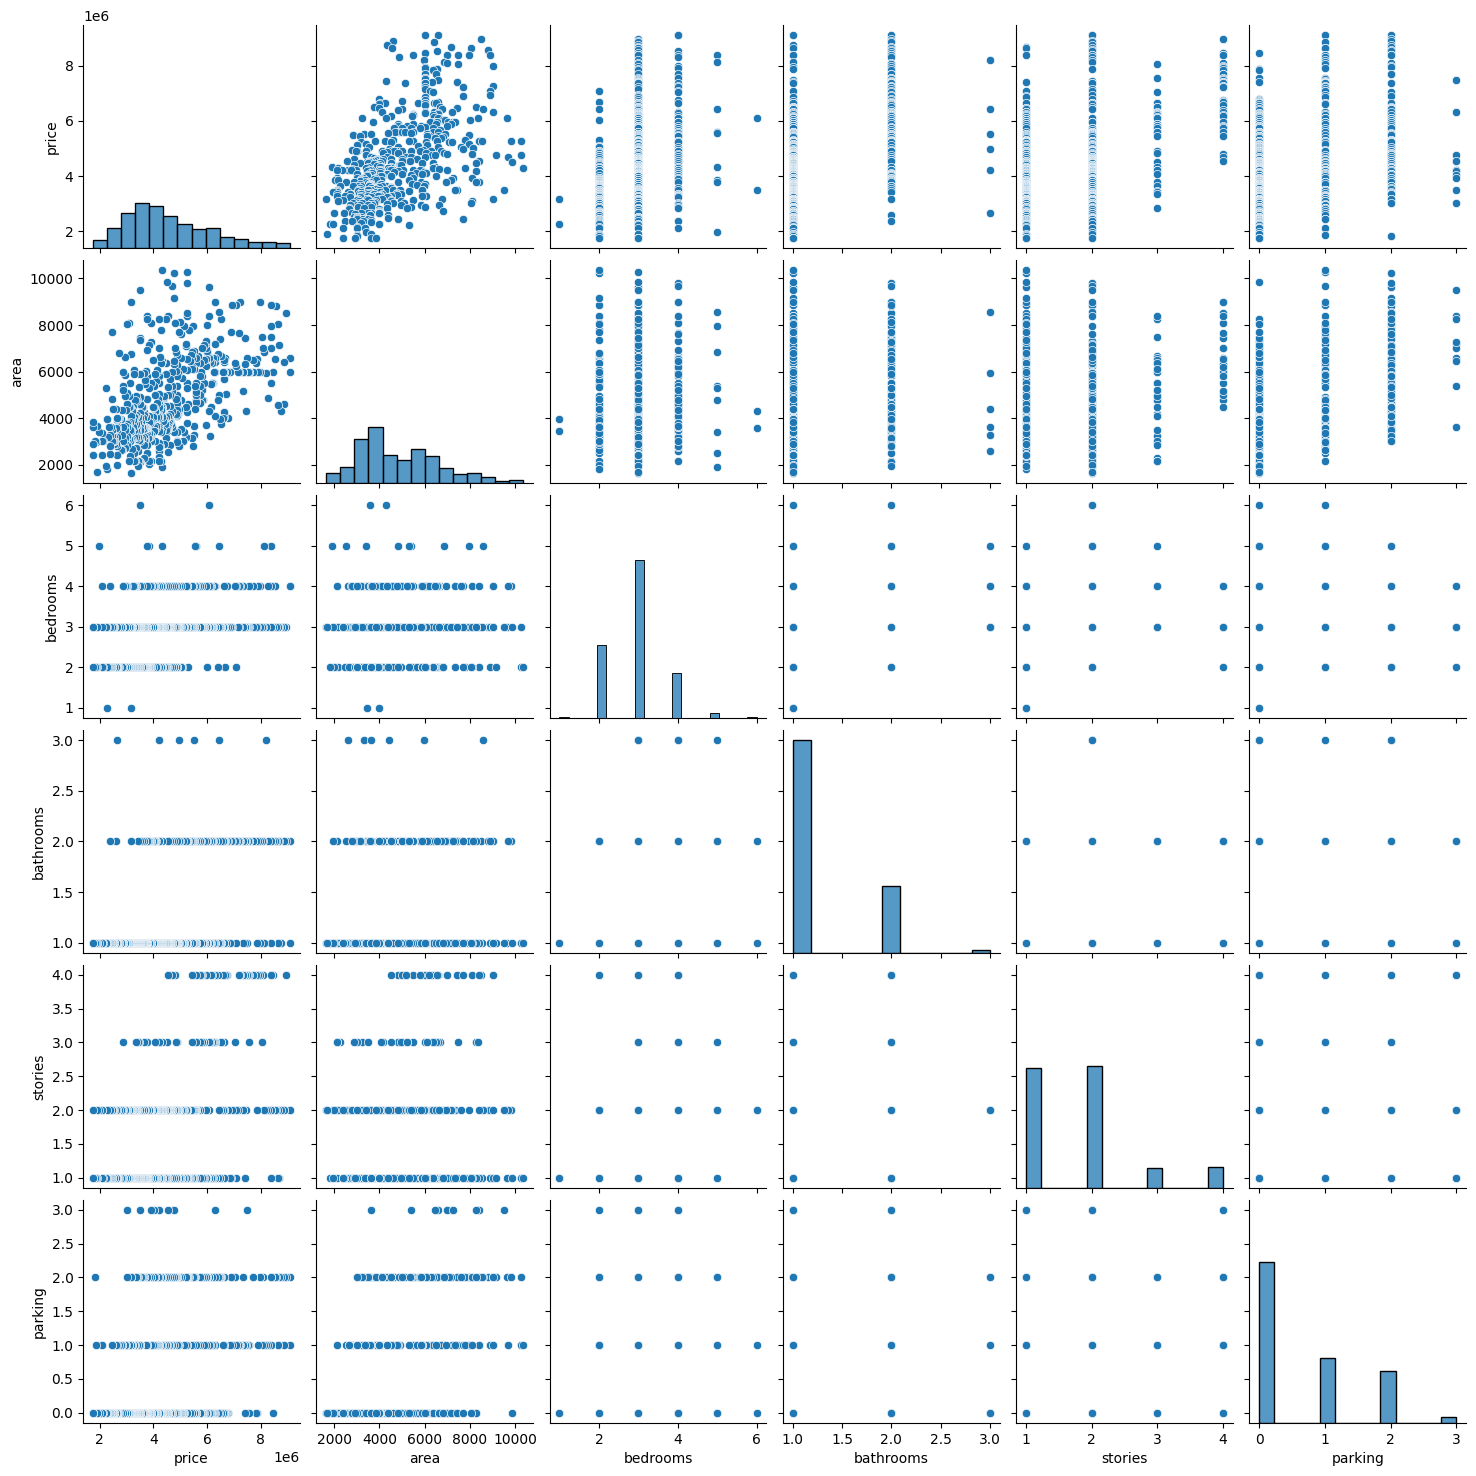

In [113]:
sns.pairplot(home)
plt.show()

Visualising Categorical Variables

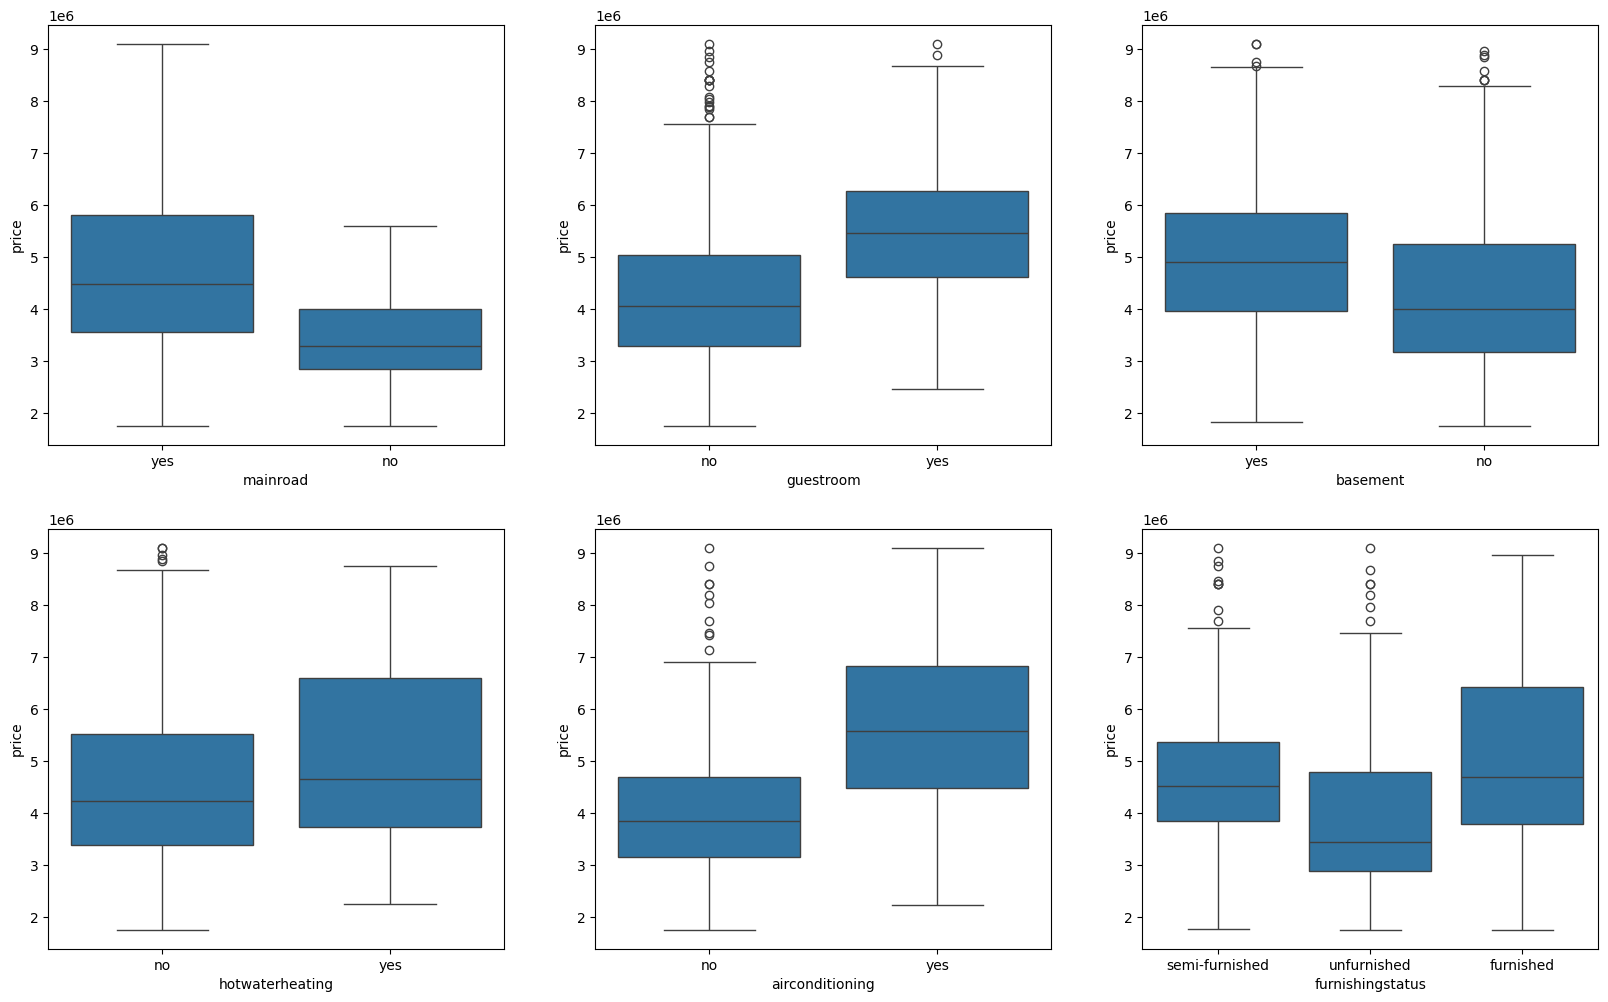

In [114]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = home)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = home)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = home)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = home)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = home)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = home)
plt.show()

**Data Preparation**

In [115]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
home[varlist] = home[varlist].apply(binary_map)


In [116]:
home.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished



**Dummy Variables**

In [117]:
status = pd.get_dummies(home['furnishingstatus'])

In [118]:
status.head()

,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False


In [119]:
home = pd.concat([home, status], axis = 1)

In [120]:
home.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,False,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,False,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,True,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,True,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,False,True,False


In [121]:
del home['furnishingstatus']

In [122]:
home.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,False,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,True,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,True,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,False,True,False


**Splitting the data into train and test set **

In [123]:
np.random.seed(0)
df_train, df_test = train_test_split(home, train_size = 0.7, test_size = 0.3, random_state = 100)

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,False,True,False
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,False,True,False
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,True,False,False
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,True,False,False
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,False,False,True


In [125]:
home = home.replace({True: 1, False: 0})
home.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,1,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,1,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,0,1,0


In [126]:
df_train.describe()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


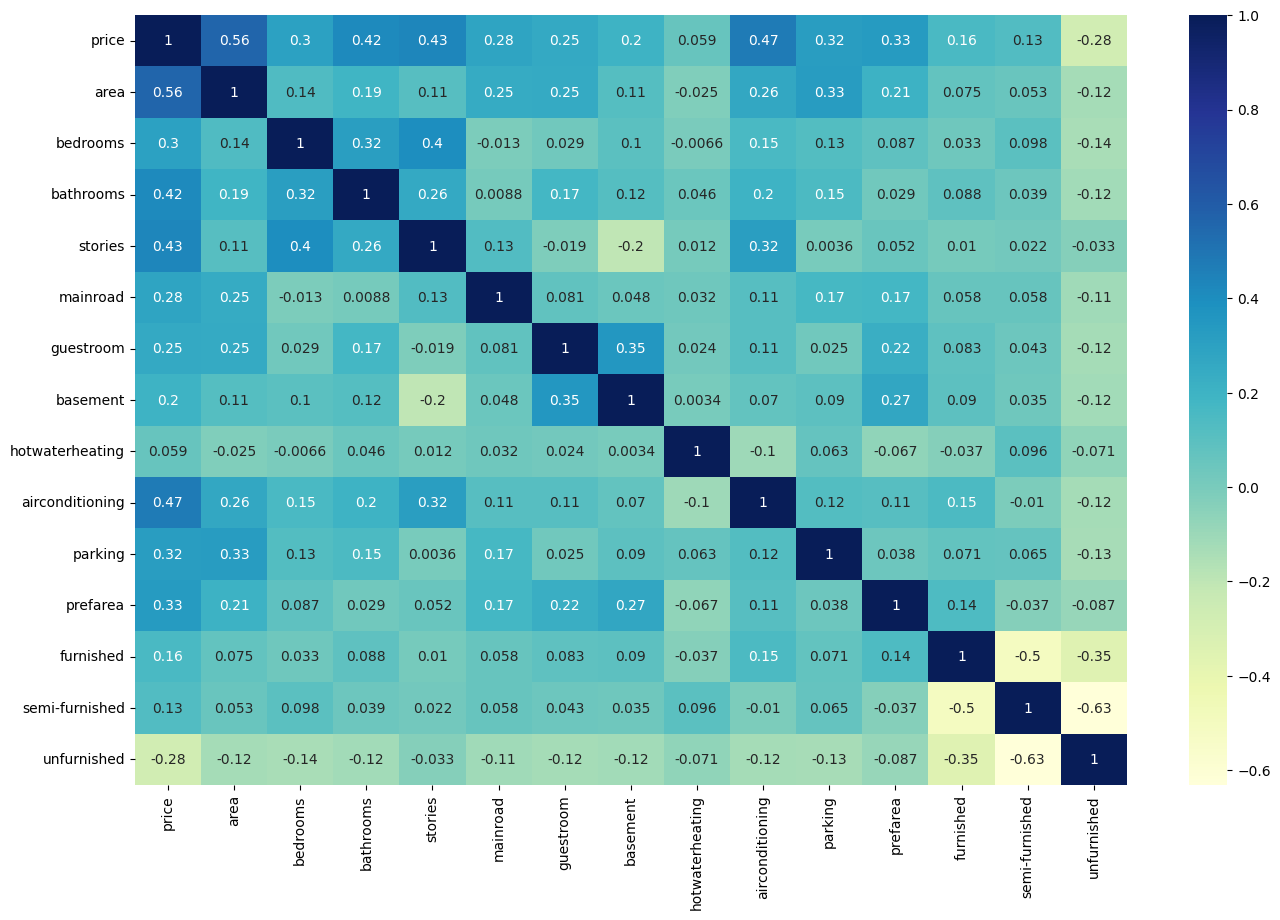

In [127]:
#Checking correlation efficient- to find highly correlated value

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Dividing into X and Y sets for the model building**

In [128]:
y_train = df_train.pop('price')
X_train = df_train

**Creating and training the model**

In [129]:
from sklearn.linear_model import LinearRegression
reg =LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

**Model Evaluation**

In [130]:
# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_train, y_train)))

Coefficients:  [3.20948951e-01 1.49365727e-02 1.61885903e-01 2.00009978e-01
 4.26058157e-02 2.09306064e-02 4.18703345e-02 7.43812807e-02
 8.49579132e-02 8.39282078e-02 8.45293874e-02 3.82556839e+13
 3.82556839e+13 3.82556839e+13]
Variance score: 0.6495271041529005


**Prediction from our model**

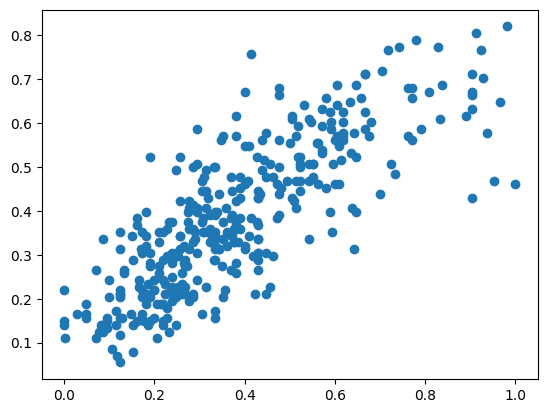

In [131]:
predictions = reg.predict(X_train)
plt.scatter(y_train,predictions)

**Residual Histogram**

<ipython-input-132-32699533819a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-predictions),bins=50);


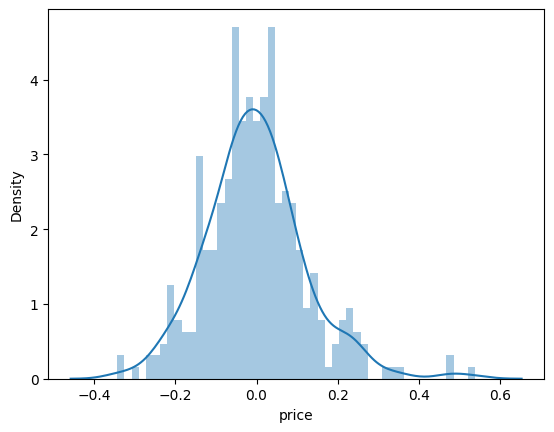

In [132]:
sns.distplot((y_train-predictions),bins=50);

**Regression Evaluation Metrics**

In [133]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, predictions))
print('MSE:', metrics.mean_squared_error(y_train, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))

MAE: 0.09291588345864663
MSE: 0.015370725021626555
RMSE: 0.12397872810134226
